Use a simple markov chain example, where there are 5 states. Then randomly generate a state transition matrix as follow:

In [3]:
import numpy as np

n_state = 5
state_transition = np.zeros((n_state, n_state))

for i in range(n_state):
    state_transition[i] = np.random.rand(n_state)
    state_transition[i] /= state_transition[i].sum()

print(state_transition)

[[0.38464318 0.01382855 0.29139927 0.30449779 0.00563121]
 [0.37090157 0.02826488 0.45173738 0.14709295 0.00200322]
 [0.20409562 0.13613493 0.20548226 0.0457985  0.40848869]
 [0.09615631 0.01823023 0.27156828 0.152546   0.46149917]
 [0.24954846 0.27734102 0.13200627 0.07724593 0.26385832]]


Consider the r(s, s') definition of MRP, generate a reword matrix which has the same rows and columns as state transition matrix:

In [6]:
reward_matrix = np.zeros((n_state, n_state))

for i in range(n_state):
    reward_matrix[i] = np.random.randint(10, size=n_state) - 3

print(reward_matrix)    

[[-1. -3.  5.  4.  0.]
 [-1.  5.  6. -3.  6.]
 [ 3.  6.  5.  3.  5.]
 [ 5.  0.  4.  0.  5.]
 [ 1. -3.  1.  4. -3.]]


Convert the r(s, s') definition of MRP to the R(s) definition of MRP, where R(s) = sum of r(s', s) for all s'.

In [9]:
reward_function = reward_matrix.sum(axis=1)
print(reward_function)

[ 5. 13. 22. 14.  0.]


Then I want to explore the stationary distribution of this markov process. Generate some initial distribution probabilities p0, and see what will happen after several state transition steps. 

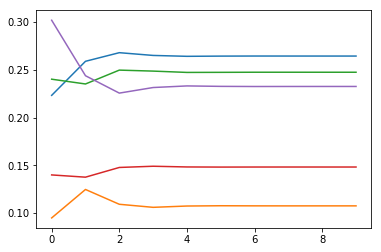

In [17]:
import matplotlib.pyplot as plt

p0 = np.random.rand(n_state)
p0 /= p0.sum()
max_iter = 10
history = np.zeros((max_iter, n_state))

for i in range(max_iter):
    p0 = p0.dot(state_transition)
    history[i][:] = p0

for i in range(n_state):
    plt.plot(range(max_iter), history[:, i])

Run this part for several times with different p0, result show that the probabilities always converge. Thus, this markov process has stationary distribution.